#  实验结果记录

In [20]:
# 记录使用input anderson normalize(0, 1)后的结果
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

import torch
import pandas as pd

# h5py
```
{
"model_000":{
    "log_dict":{
        'train_loss_per_batch':[],
        'train_loss_per_epoch': [],
        'validate_loss_per_batch': [],  #可选
        'validate_loss_per_epoch':[]    #可选
        }
    }
"model_001":{}
}
```

In [54]:
def plot_loss_epoch(file, title, n_model='model_000', train_only=False, begin=0):
        with h5py.File(file, 'r') as loss_f:
            train_grp = loss_f[n_model]['log_dict']
            train_loss = train_grp['train_loss_per_epoch'][:]
            validate_loss = train_grp['validate_loss_per_epoch'][:]

            test_loss = loss_f[n_model]['test_log_dict']['test_loss_per_epoch'][:]
            # plot mse rather rmse , make confuse
            train_loss = np.array(train_loss)
            validate_loss = np.array(validate_loss)
            test_loss = np.array(test_loss)
            # plt.figure(figsize=(15, 5))
            plt.plot(np.arange(len(train_loss) - begin)+1 + begin, train_loss[begin:], '-o', label='train')
            plt.plot(len(train_loss), test_loss[0], '-o', label='test')
            
            if train_only is False:
                plt.plot(np.arange(len(validate_loss) - begin)+1 + begin, validate_loss[begin:], '-o', label='validate')
            plt.grid()
            plt.xlabel('Epoch')
            plt.ylabel('MSE')
            plt.yscale('log')
            plt.title(label=title)
            plt.legend()
            print(f'train_loss mse: {train_loss[-1]}')
            print(f'validate_loss mse: {validate_loss}')
            print(f'test_loss mse: {test_loss[-1]}')
            

In [22]:
def plot_loss_batch(file, title, n_model='model_000', train_only=True, begin=0):
        with h5py.File(file, 'r') as loss_f:
            train_grp = loss_f[n_model]['log_dict']
            train_loss = train_grp['train_loss_per_batch'][:]
            validate_loss = train_grp['validate_loss_per_batch'][:]

            test_loss = loss_f[n_model]['test_log_dict']['test_loss_per_batch'][:]
            
            train_loss = np.array(train_loss)
            validate_loss = np.array(validate_loss)
            test_loss = np.array(test_loss)
            plt.plot(np.arange(len(train_loss) - begin)+1 + begin, train_loss[begin:], '-o', label='train')
            plt.plot(len(train_loss), test_loss[0], '-o', label='test')

            if train_only is False:
                plt.plot(np.arange(len(validate_loss) - begin)+1 + begin, validate_loss[begin:], '-o', label='validate')
            plt.grid()
            plt.xlabel('Batch')
            plt.ylabel('MSE')
            plt.title(label=title)
            plt.legend()
            print(f'train_loss mse : {train_loss[-1]}')
            print(f'validate_loss mse : {validate_loss[-1]}')
            print(f'test_loss mse: {test_loss[-1]}')


In [23]:
def subfigure_loss(file, title, n_model='model_000'):
    part = 4
    row = int(np.floor(np.sqrt(part)))
    col = int(np.ceil(np.sqrt(part)))
    h5 = h5py.File(file, 'r')
    fig, axes = plt.subplots(row, col, figsize=(10, 5))
    train_grp = h5[n_model]['log_dict']
    train_loss = train_grp['train_loss_per_epoch'][:]
    validate_loss = train_grp['validate_loss_per_epoch'][:]
    test_loss = h5[n_model]['test_log_dict']['test_loss_per_epoch'][:]
    
    figure_len = len(train_loss) // (part - 1)
    fig.text(0.5, 0.04, 'Epoch')
    fig.text(0.04, 0.5, 'MSE', rotation='vertical')
    plt.suptitle(title)
    for i in range(part):
        x_axis = np.arange(i * figure_len, (i + 1) * figure_len )
        if i == part-1:
            x_axis = np.arange(i * figure_len , len(train_loss))
            
        if row==0:
            ax_i = axes[i]
        else:
            ax_i = axes[i // col, i % col]
        train = train_loss[x_axis]
        validate = validate_loss[x_axis]
        ax_i.plot(x_axis+1, train, '-o', label='train loss')
        ax_i.plot(x_axis+1, validate, '-o', label='validate loss')
        ax_i.grid()
        # ax_i.axis('off')
    
    ax_i.plot(len(train_loss), test_loss[0], '1', label='test loss')
    handles, labels = ax_i.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    # savename = file.split('.')[0]
    # fig.savefig(savename + '.png')
    plt.show()
    h5.close()


file_1 train loss, mse: [4.63410594e-05 4.55904164e-05 4.57563300e-05 4.60018033e-05
 4.59384144e-05]
file_1 test loss, mse: [4.63651236e-05]

file_2 train loss, mse: [6.21191883e-05 4.66917663e-05 5.21035001e-05 5.01840097e-05
 4.59455662e-05]
file_2 test loss, mse: [4.66687902e-05]


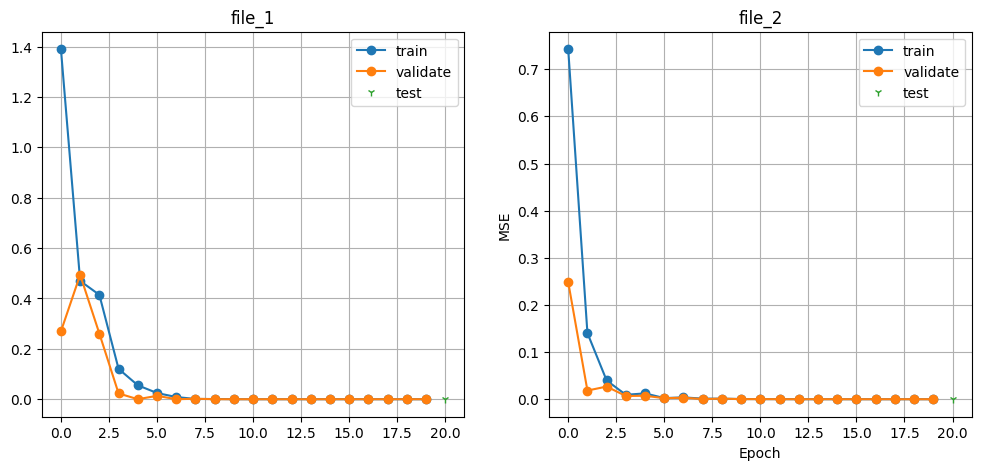

In [24]:
def compare_loss_1(file_1, file_2, n_model='model_000'):
    fig, axes = plt.subplots(1,2, figsize=(12, 5))
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    h5_1 = h5py.File(file_1, 'r')
    train_grp_1 = h5_1[n_model]['log_dict']
    train_loss_1 = train_grp_1['train_loss_per_epoch'][:]
    validate_loss_1 = train_grp_1['validate_loss_per_epoch'][:]
    test_loss_1 = h5_1[n_model]['test_log_dict']['test_loss_per_epoch'][:]
    print(f'file_1 train loss, mse: {train_loss_1[-5:]}')
    print(f'file_1 test loss, mse: {test_loss_1}')
    
    axes[0].plot(train_loss_1, '-o', label='train')
    axes[0].plot(validate_loss_1, '-o', label='validate')
    axes[0].plot(len(train_loss_1),test_loss_1, '1', label='test')
    print()
    
    axes[0].set_title('file_1')
    axes[0].legend()
    axes[0].grid()

    h5_2 = h5py.File(file_2, 'r')
    train_grp_2 = h5_2[n_model]['log_dict']
    train_loss_2 = train_grp_2['train_loss_per_epoch'][:]
    validate_loss_2 = train_grp_2['validate_loss_per_epoch'][:]
    test_loss_2 = h5_2[n_model]['test_log_dict']['test_loss_per_epoch'][:]
    print(f'file_2 train loss, mse: {train_loss_2[-5:]}')
    print(f'file_2 test loss, mse: {test_loss_2}')
    
    axes[1].plot(train_loss_2, '-o', label='train')
    axes[1].plot(validate_loss_2, '-o', label='validate')
    axes[1].plot(len(train_loss_2),test_loss_2, '1', label='test')
    axes[1].set_title('file_2')
    axes[1].legend()
    axes[1].grid()
    plt.show()
compare_loss_1(file_1, file_2)

In [53]:
def compare_loss_2(file_1, file_2, n_model='model_000'):
    fig, axes = plt.subplots(1,2, figsize=(12, 5))
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    h5_1 = h5py.File(file_1, 'r')
    train_grp_1 = h5_1[n_model]['log_dict']
    train_loss_1 = train_grp_1['train_loss_per_epoch'][:]
    validate_loss_1 = train_grp_1['validate_loss_per_epoch'][:]
    test_loss_1 = h5_1[n_model]['test_log_dict']['test_loss_per_epoch'][:]
    print(f'file_1 train loss, mse: {train_loss_1[-5:]}')
    print(f'file_1 test loss, mse: {test_loss_1}')

    h5_2 = h5py.File(file_2, 'r')
    train_grp_2 = h5_2[n_model]['log_dict']
    train_loss_2 = train_grp_2['train_loss_per_epoch'][:]
    validate_loss_2 = train_grp_2['validate_loss_per_epoch'][:]
    print(f'validate {validate_loss_2}')
    test_loss_2 = h5_2[n_model]['test_log_dict']['test_loss_per_epoch'][:]
    print(f'file_2 train loss, mse: {train_loss_2[-5:]}')
    print(f'file_2 test loss, mse: {test_loss_2}')
    print()
    
    axes[0].plot(train_loss_1, '-o', label='file1')
    axes[0].plot(train_loss_2, '-o', label='file2')
    axes[0].set_title('train')
    axes[0].legend()
    axes[0].grid()
    axes[0].set_yscale('log')
    
    axes[1].plot(validate_loss_1, '-o', label='file1')
    axes[1].plot(validate_loss_2, '-o', label='file2')
    axes[1].set_title('validate')
    axes[1].legend()
    axes[1].grid()
    axes[1].set_yscale('log')
    plt.show()


## layer 7

## test1
使用 chebyshev_median.h5中的中位数，4000的训练集，查看模型的loss。

In [26]:
training_file = "datasets/chebyshev_0_4000.h5"
testing_file = "datasets/chebyshev_testing_1000.h5",
# train data
from run_mlp import main
# main('config_1.json')

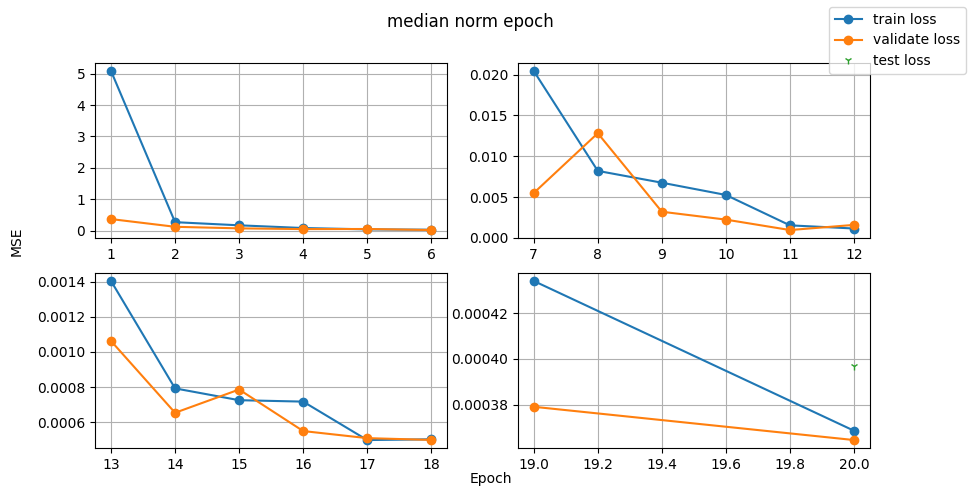

In [27]:
# 使用median规范后，进行训练，训练配置文件config_1.json，每个epoch训练的rmse如下图所示。
subfigure_loss(file='nn_7/loss_1.h5', title="median norm epoch")

train_loss mse: 0.00036856343455180256
validate_loss mse: 0.00036448235889877155
test_loss mse: 0.0003970158037360209


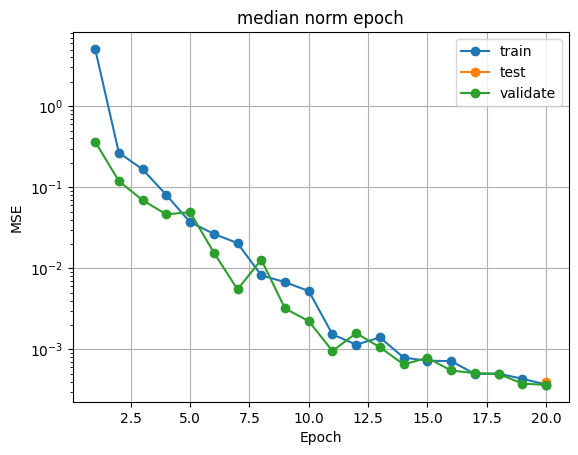

In [37]:
# plot epoch loss
plot_loss_epoch(file='nn_7/loss_1.h5', title="median norm epoch", begin=0)

In [30]:
file = 'nn_7/loss_1.h5'
h5 = h5py.File(file, 'r')
h5['model_000']['log_dict']['train_loss_per_batch'][-8:],h5['model_000']['log_dict']['validate_loss_per_batch'][-2:]

(array([0.00047923, 0.00045775, 0.00038872, 0.00041075, 0.00035946,
        0.00037398, 0.00036788, 0.00037293]),
 array([0.00037904, 0.00036448]))

# layer 14

## test2
与test1 相比，使用MyMLP_14，查看模型的loss。

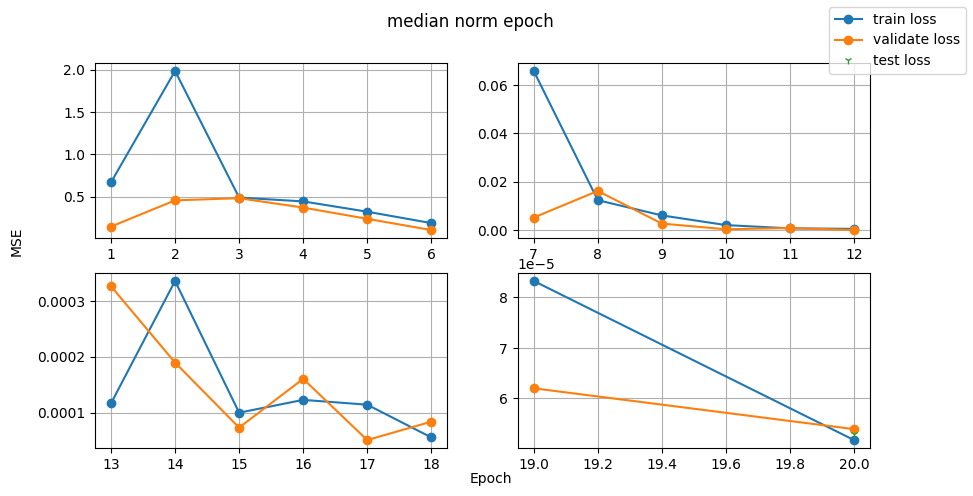

In [32]:
# 使用median规范后，进行训练，训练配置文件config_1.json，每个epoch训练的rmse如下图所示。
subfigure_loss(file='nn_14/loss_2.h5', title="median norm epoch")

In [33]:
file = 'nn_14/loss_2.h5'
h5 = h5py.File(file, 'r')
h5['model_000']['log_dict']['train_loss_per_batch'][-8:],h5['model_000']['log_dict']['validate_loss_per_batch'][-2:]

(array([8.56279566e-05, 7.98107097e-05, 8.61176768e-05, 8.15223096e-05,
        5.92012271e-05, 5.56063099e-05, 4.41345815e-05, 4.80916851e-05]),
 array([6.20091832e-05, 5.39181759e-05]))

train_loss mse: 5.1758450905833296e-05
validate_loss mse: 5.3918175894360615e-05
test_loss mse: 5.292400192291546e-05


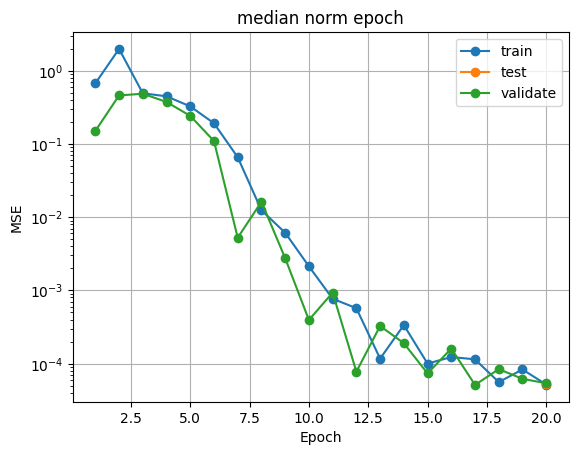

In [39]:
plot_loss_epoch(file='nn_14/loss_2.h5', title="median norm epoch", begin=0)
plt.yscale('log')

从上面看， 配置不变，网络加深，loss是变小了。,说明7层，模型过于简单

## test3
与test2相比，训练集变为10000，查看模型的loss。
- Increase the size of your training dataset

在比较数据集大小时，其他保持不变，训练数据从4000->10000, loss变小一些。

In [51]:
# we use L6N255_10000.h5 to train nn-7
training_file = "datasets/chebyshev_0_10000.h5"
testing_file = "datasets/chebyshev_testing_1000.h5"
config = 'config_3.json'
loss_f = 'nn_14/loss_3.h5'


train_loss mse: 4.557252656471913e-05
validate_loss mse: [1.29386627e-01 2.38251398e-03 1.11538249e-04 4.69934544e-05
 5.09088340e-05 4.74957343e-05 4.73990533e-05 4.71683589e-05
 4.69796774e-05 4.69969534e-05 4.69821017e-05 4.69865710e-05
 4.69757977e-05 4.70055702e-05 4.69761782e-05 4.69780298e-05
 4.69753513e-05 4.69802999e-05 4.69772557e-05 4.69754589e-05]
test_loss mse: 4.6096413558487925e-05


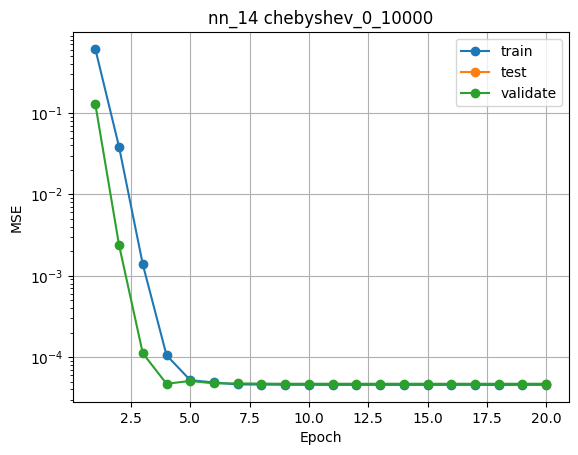

In [55]:
plot_loss_epoch(loss_f, title='nn_14 chebyshev_0_10000')
# 看着效果没有改善

file_1 train loss, mse: [1.23063339e-04 1.14462284e-04 5.59286663e-05 8.32696632e-05
 5.17584509e-05]
file_1 test loss, mse: [5.29240019e-05]

file_2 train loss, mse: [4.55804948e-05 4.56127593e-05 4.54735048e-05 4.56148473e-05
 4.55725266e-05]
file_2 test loss, mse: [4.60964136e-05]


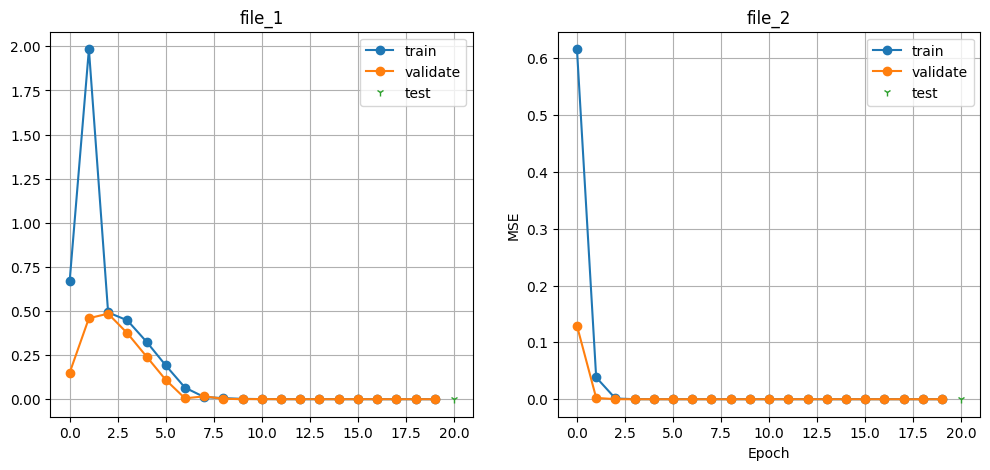

In [57]:
file_1 = 'nn_14/loss_2.h5'
file_2 = 'nn_14/loss_3.h5'
compare_loss_1(file_1, file_2)
# 图 左边为 train size:4000, 右边为train size:10000

file_1 train loss, mse: [1.23063339e-04 1.14462284e-04 5.59286663e-05 8.32696632e-05
 5.17584509e-05]
file_1 test loss, mse: [5.29240019e-05]
validate [1.29386627e-01 2.38251398e-03 1.11538249e-04 4.69934544e-05
 5.09088340e-05 4.74957343e-05 4.73990533e-05 4.71683589e-05
 4.69796774e-05 4.69969534e-05 4.69821017e-05 4.69865710e-05
 4.69757977e-05 4.70055702e-05 4.69761782e-05 4.69780298e-05
 4.69753513e-05 4.69802999e-05 4.69772557e-05 4.69754589e-05]
file_2 train loss, mse: [4.55804948e-05 4.56127593e-05 4.54735048e-05 4.56148473e-05
 4.55725266e-05]
file_2 test loss, mse: [4.60964136e-05]



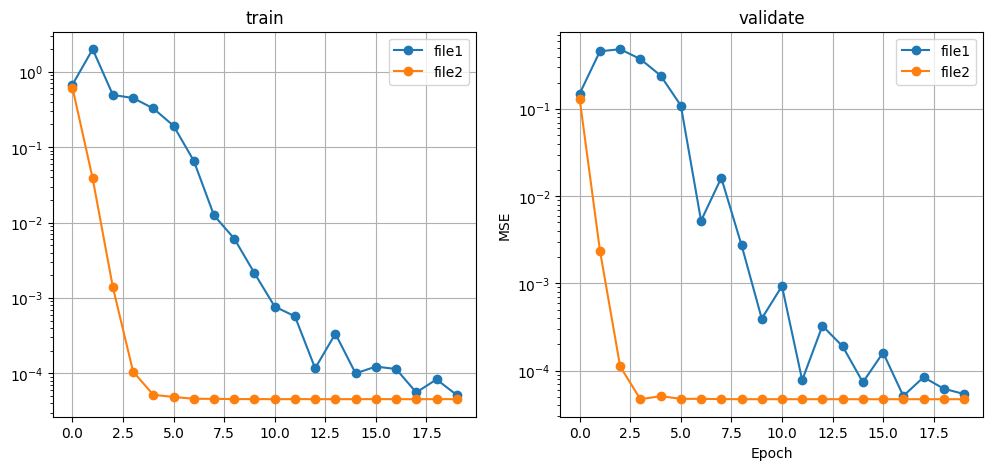

In [58]:
# 这个图比较 train的变化，右边是validate的变化
compare_loss_2(file_1, file_2)

## test4
增加batch_size:1024----> 2048
差别不大，但是batch_size选择不一样，会导致loss 抖动

file_1 train loss, mse: [4.55804948e-05 4.56127593e-05 4.54735048e-05 4.56148473e-05
 4.55725266e-05]
file_1 test loss, mse: [4.60964136e-05]
file_2 train loss, mse: [4.63410594e-05 4.55904164e-05 4.57563300e-05 4.60018033e-05
 4.59384144e-05]
file_2 test loss, mse: [4.63651236e-05]



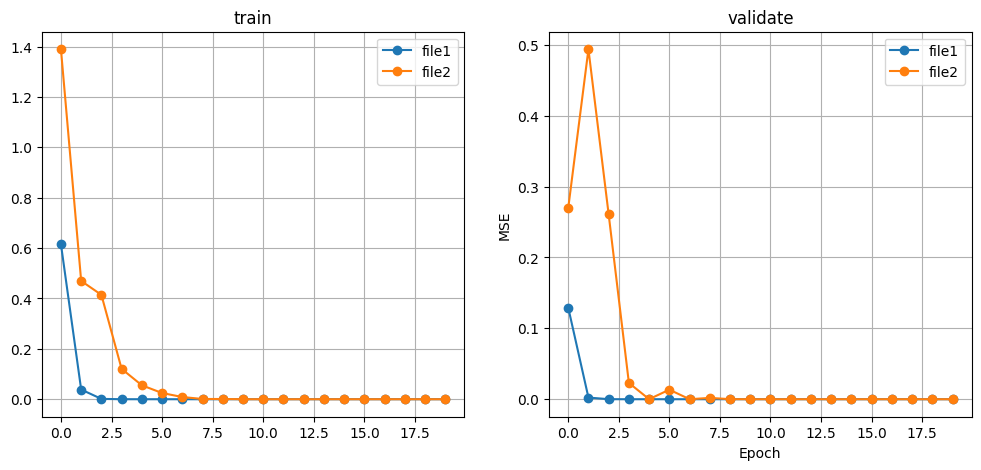

In [44]:
file_1 = 'nn_14/loss_3.h5'   # 1024
file_2 = 'nn_14/loss_4.h5'   # 2048
compare_loss_2(file_1, file_2)

## test5
与test4相比，数据集改成将anderson模型规范化，规范化为8个维度，每个维度的均值方差记在10000_norm_meta.h5，Chebyshev系数与test4一样，也是使用median规范化的。
- Normalize your input data
Scaling the input features to a similar range can prevent certain features from dominating the learning process and help the MLP model converge faster.

file_1 train loss, mse: [4.63410594e-05 4.55904164e-05 4.57563300e-05 4.60018033e-05
 4.59384144e-05]
file_1 test loss, mse: [4.63651236e-05]
file_2 train loss, mse: [6.21191883e-05 4.66917663e-05 5.21035001e-05 5.01840097e-05
 4.59455662e-05]
file_2 test loss, mse: [4.66687902e-05]



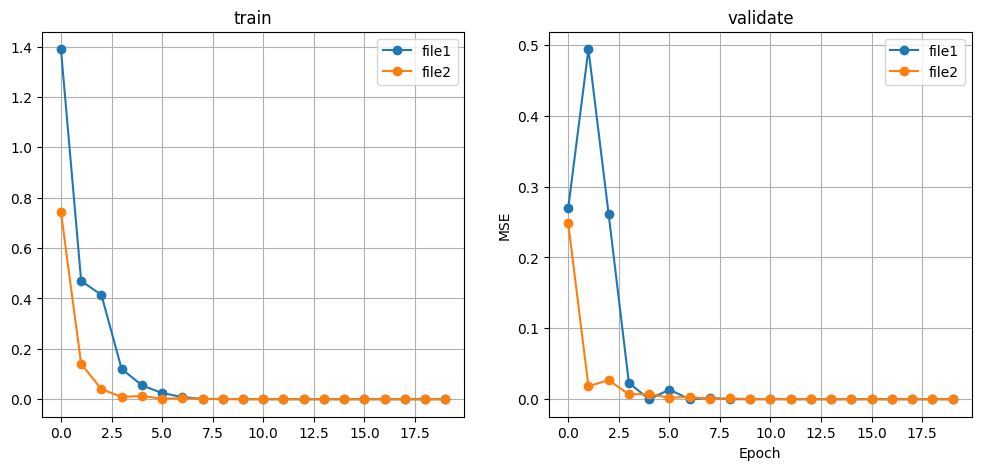

In [45]:
file_1 = 'nn_14/loss_4.h5'   # test4
file_2 = "nn_14/loss_5.h5"   # test5
compare_loss_2(file_1, file_2)

## **Adjust the architecture of your MLP**: 
Experiment with different numbers of hidden layers, neurons per layer, and activation functions to find the optimal configuration for your specific problem.
> resnet